# PyTorch. Основы: синтаксис, torch.cuda и torch.autograd

## Задание 7.1

In [27]:
import torch
import matplotlib.pyplot as plt
from torch.autograd import Variable

### Задача 1

1). Создайте два вещественных тензора: `a` размером (3, 4) и `b` размером (12,)   
2). Создайте тензор `c`, являющийся тензором `b`, но размера (2, 2, 3)  
3). Выведите первый столбец матрицы `a` с помощью индексации

In [3]:
a = torch.rand(3, 4)
b = torch.rand(12)
a, b

(tensor([[0.1581, 0.8358, 0.1647, 0.8053],
         [0.2708, 0.8172, 0.7477, 0.7298],
         [0.0848, 0.7314, 0.1545, 0.8049]]),
 tensor([0.0494, 0.0562, 0.8248, 0.9703, 0.0404, 0.5310, 0.4921, 0.3961, 0.7774,
         0.0730, 0.9149, 0.4674]))

In [4]:
c = b.reshape(2, 2, 3)
c

tensor([[[0.0494, 0.0562, 0.8248],
         [0.9703, 0.0404, 0.5310]],

        [[0.4921, 0.3961, 0.7774],
         [0.0730, 0.9149, 0.4674]]])

In [5]:
a[:, 0]

tensor([0.1581, 0.2708, 0.0848])

### Задача 2

1). Создайте два вещественных тензора: `a` размером (5, 2) и `b` размером (1,10)   
2). Создайте тензор `c`, являющийся тензором `b`, но размера (5, 2)  
3). Произведите все арифметические операции с тензорами `a` и `c`

In [6]:
a = torch.rand(5, 2)
b = torch.rand(1, 10)
a, b

(tensor([[0.2760, 0.0149],
         [0.0293, 0.8060],
         [0.9272, 0.2032],
         [0.2217, 0.2259],
         [0.7107, 0.7164]]),
 tensor([[0.3545, 0.7466, 0.6910, 0.0184, 0.9174, 0.2310, 0.9826, 0.9956, 0.8239,
          0.8317]]))

In [7]:
c = b.reshape(5, 2)
c

tensor([[0.3545, 0.7466],
        [0.6910, 0.0184],
        [0.9174, 0.2310],
        [0.9826, 0.9956],
        [0.8239, 0.8317]])

**Сложение**

In [8]:
a.add(c)

tensor([[0.6305, 0.7616],
        [0.7203, 0.8244],
        [1.8446, 0.4342],
        [1.2043, 1.2215],
        [1.5346, 1.5481]])

**Вычитание**

In [9]:
a.sub(c)

tensor([[-0.0785, -0.7317],
        [-0.6617,  0.7875],
        [ 0.0098, -0.0277],
        [-0.7608, -0.7697],
        [-0.1132, -0.1153]])

**Умножение**

In [10]:
a.mul(c)

tensor([[0.0978, 0.0112],
        [0.0203, 0.0149],
        [0.8506, 0.0469],
        [0.2178, 0.2249],
        [0.5855, 0.5959]])

**Деление**

In [11]:
a.div(c)

tensor([[7.7852e-01, 2.0011e-02],
        [4.2422e-02, 4.3693e+01],
        [1.0107e+00, 8.7992e-01],
        [2.2564e-01, 2.2692e-01],
        [8.6261e-01, 8.6135e-01]])

### Задача 3

1). Создайте тензор *целых чисел* `images` размерности (100, 200, 200, 3) (можно интерпретировать это как 100 картинок размера 200х200 с тремя цветовыми каналами, то есть 100 цветных изображений 200х200). Заполните его нулями  

2). Сделайте так, чтобы у $i$-ой по порядку картинки была нарисована белая полоса толщиной два пикселя в строках, которые соответствуют номеру картинки. Например, у 3-ей по порядку картинки белая полоска будет занимать 6 и 7 строки, у 99 - 198 и 199. Сделать белую строку можно, записав в ячейки тензора число 255 (по всем трём каналам). Выведите несколько примеров с помощью `pylot`  

3). Посчитайте среднее тензора `images` по 1-ой оси (по сути - средняя картинка), умножьте полученный тензор на 70. Нарисуйте с помощью `pyplot`, должна получиться серая картинка (при взятии среднего нужно привести тензор к float с помощью `.float()`, при отрисовке обратно к int с помощью `.int()`)

In [12]:
images = torch.IntTensor(100, 200, 200, 3).zero_()

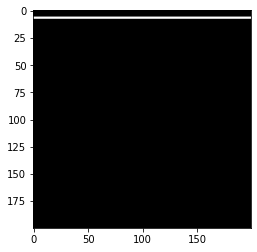

In [13]:
for i in range(images.shape[0]):
  images[i][2*i:2*i+2] = 255
plt.imshow(images[3])

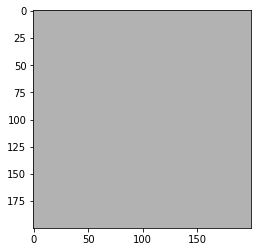

In [14]:
plt.imshow((images.float().mean(0) * 70).int())

### Задача 4

- В Colab нажмите в меню сверху: `Runtime` -> `Change Runtime Type` -> `GPU`, где изначально стоит `None` (`Среда выполнение` - `Сменить среду выполнения`)
- Объявите тензор `a` размера (2, 3, 4) и тензор `b` размера (1, 8, 3) на GPU, иницилизируйте их случайно равномерно (`.uniform_()`)
- Затем измените форму тензора `b`, чтобы она совпадала с формой тензора `a`, получите тензор `c`  
- Переместите `c` на CPU, переместите `a` на CPU  
- Оберните их в `Variable()`
- Объявите тензор `L = torch.mean((c - a) `**` 2)` и посчитайте градиент `L` по `c` ( то есть $\frac{\partial{L}}{\partial{c}})$
- Выведите градиент `L` по `c`

In [16]:
a = torch.rand(2, 3, 4).uniform_().cuda()
b = torch.rand(1, 8, 3).uniform_().cuda()
a, b

(tensor([[[0.2502, 0.5469, 0.8704, 0.6962],
          [0.2157, 0.9777, 0.6638, 0.4355],
          [0.9857, 0.2256, 0.8829, 0.0759]],
 
         [[0.6560, 0.4347, 0.8059, 0.3803],
          [0.9793, 0.0328, 0.8513, 0.7974],
          [0.4249, 0.0461, 0.6581, 0.7719]]], device='cuda:0'),
 tensor([[[0.4556, 0.7131, 0.3859],
          [0.2989, 0.0375, 0.9466],
          [0.5428, 0.6610, 0.4539],
          [0.5464, 0.9931, 0.9200],
          [0.8034, 0.3544, 0.8312],
          [0.8841, 0.0093, 0.2547],
          [0.0840, 0.1899, 0.9763],
          [0.6553, 0.4606, 0.1272]]], device='cuda:0'))

In [24]:
c = b.reshape(a.shape)
a.size() == c.size()

True

In [25]:
c = c.cpu()
a = a.cpu()
a, c

(tensor([[[0.2502, 0.5469, 0.8704, 0.6962],
          [0.2157, 0.9777, 0.6638, 0.4355],
          [0.9857, 0.2256, 0.8829, 0.0759]],
 
         [[0.6560, 0.4347, 0.8059, 0.3803],
          [0.9793, 0.0328, 0.8513, 0.7974],
          [0.4249, 0.0461, 0.6581, 0.7719]]]),
 tensor([[[0.4556, 0.7131, 0.3859, 0.2989],
          [0.0375, 0.9466, 0.5428, 0.6610],
          [0.4539, 0.5464, 0.9931, 0.9200]],
 
         [[0.8034, 0.3544, 0.8312, 0.8841],
          [0.0093, 0.2547, 0.0840, 0.1899],
          [0.9763, 0.6553, 0.4606, 0.1272]]]))

In [46]:
a = Variable(a)
c = Variable(c, requires_grad=True)
a, c

(tensor([[[0.2502, 0.5469, 0.8704, 0.6962],
          [0.2157, 0.9777, 0.6638, 0.4355],
          [0.9857, 0.2256, 0.8829, 0.0759]],
 
         [[0.6560, 0.4347, 0.8059, 0.3803],
          [0.9793, 0.0328, 0.8513, 0.7974],
          [0.4249, 0.0461, 0.6581, 0.7719]]]),
 tensor([[[0.4556, 0.7131, 0.3859, 0.2989],
          [0.0375, 0.9466, 0.5428, 0.6610],
          [0.4539, 0.5464, 0.9931, 0.9200]],
 
         [[0.8034, 0.3544, 0.8312, 0.8841],
          [0.0093, 0.2547, 0.0840, 0.1899],
          [0.9763, 0.6553, 0.4606, 0.1272]]], requires_grad=True))

In [56]:
L = torch.mean((c - a)**2)
L.backward()

In [57]:
c.grad

tensor([[[ 0.0685,  0.0554, -0.1615, -0.1324],
         [-0.0594, -0.0104, -0.0403,  0.0752],
         [-0.1773,  0.1069,  0.0368,  0.2814]],

        [[ 0.0491, -0.0268,  0.0084,  0.1679],
         [-0.3233,  0.0739, -0.2558, -0.2025],
         [ 0.1838,  0.2031, -0.0658, -0.2149]]])